In [2]:
# Importing Libraries and Dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r"C:\Users\tanya\Downloads\Tanya Vishwakarma minor\OCD Patient Dataset_ Demographics & Clinical Data.csv")

In [3]:
# Initial Data Exploration

# Display the first few rows of the dataset
print(df.head())

# Get a summary of the dataset
print(df.info())

# Check for missing values
print(df.isnull().sum())

   Patient ID  Age  Gender Ethnicity Marital Status Education Level  \
0        1018   32  Female   African         Single    Some College   
1        2406   69    Male   African       Divorced    Some College   
2        1188   57    Male  Hispanic       Divorced  College Degree   
3        6200   27  Female  Hispanic        Married  College Degree   
4        5824   56  Female  Hispanic        Married     High School   

  OCD Diagnosis Date  Duration of Symptoms (months) Previous Diagnoses  \
0         2016-07-15                            203                MDD   
1         2017-04-28                            180                NaN   
2         2018-02-02                            173                MDD   
3         2014-08-25                            126               PTSD   
4         2022-02-20                            168               PTSD   

  Family History of OCD Obsession Type Compulsion Type  \
0                    No   Harm-related        Checking   
1           

In [4]:
# Descriptive Statistics

# Summary statistics for numerical columns
print("Summary Statistics for Numerical Columns:")
print(df.describe())

# Summary statistics for categorical (object-type) columns
print("\nSummary Statistics for Categorical Columns:")
print(df.describe(include=['O']))

Summary Statistics for Numerical Columns:
        Patient ID          Age  Duration of Symptoms (months)  \
count  1500.000000  1500.000000                    1500.000000   
mean   5541.254000    46.781333                     121.745333   
std    2562.389469    16.830321                      67.404610   
min    1017.000000    18.000000                       6.000000   
25%    3338.000000    32.000000                      64.000000   
50%    5539.500000    47.000000                     121.000000   
75%    7745.500000    61.000000                     178.000000   
max    9995.000000    75.000000                     240.000000   

       Y-BOCS Score (Obsessions)  Y-BOCS Score (Compulsions)  
count                1500.000000                  1500.00000  
mean                   20.048000                    19.62600  
std                    11.823884                    11.78287  
min                     0.000000                     0.00000  
25%                    10.000000                

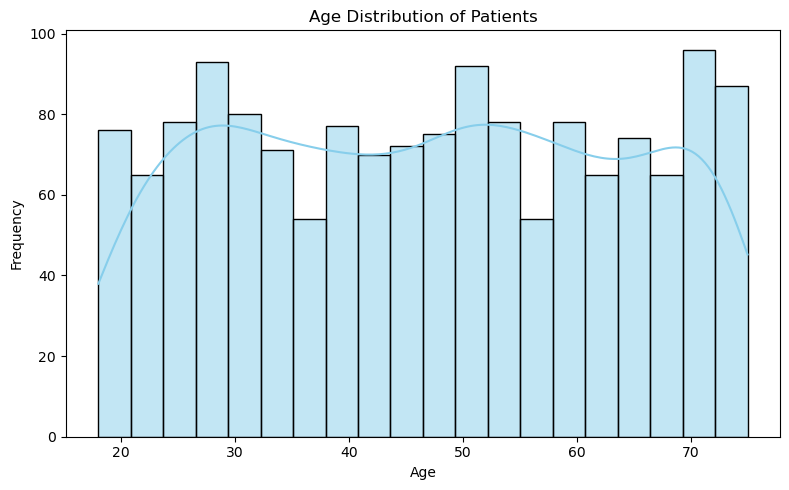

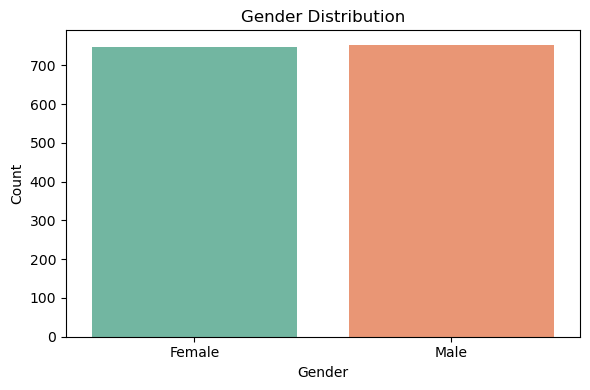

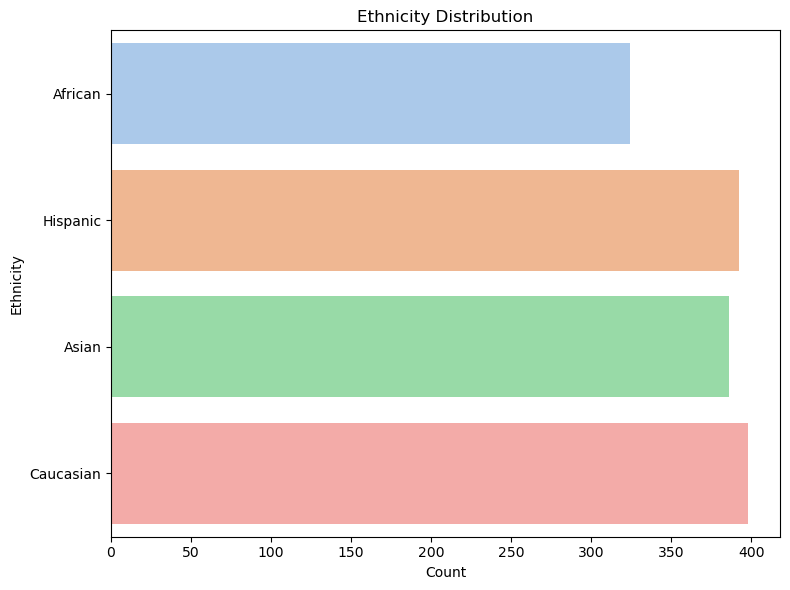

In [6]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Gender Distribution (no warning, safe legend handling)
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Gender', data=df, hue='Gender', dodge=False, palette='Set2')
if ax.legend_:
    ax.legend_.remove()
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Ethnicity Distribution (no warning, safe legend handling)
plt.figure(figsize=(8, 6))
ax = sns.countplot(y='Ethnicity', data=df, hue='Ethnicity', dodge=False, palette='pastel')
if ax.legend_:
    ax.legend_.remove()
plt.title('Ethnicity Distribution')
plt.xlabel('Count')
plt.ylabel('Ethnicity')
plt.tight_layout()
plt.show()

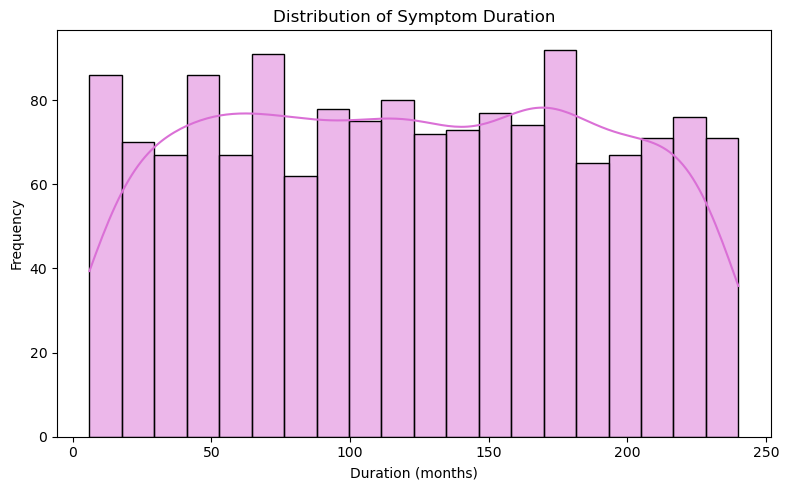

C:\Users\tanya\AppData\Local\Temp\ipykernel_18044\4251483079.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df, palette='coolwarm')


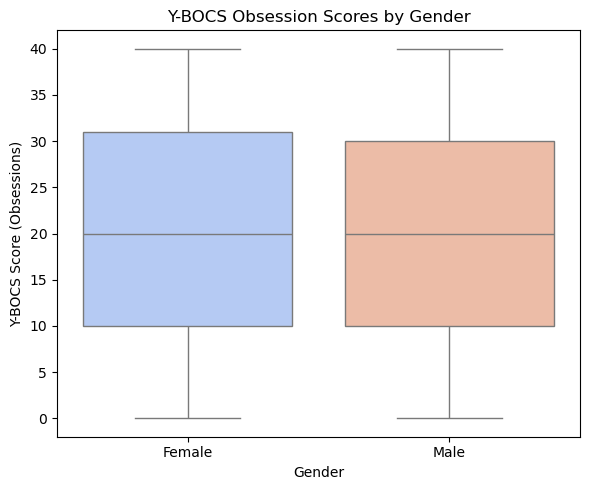

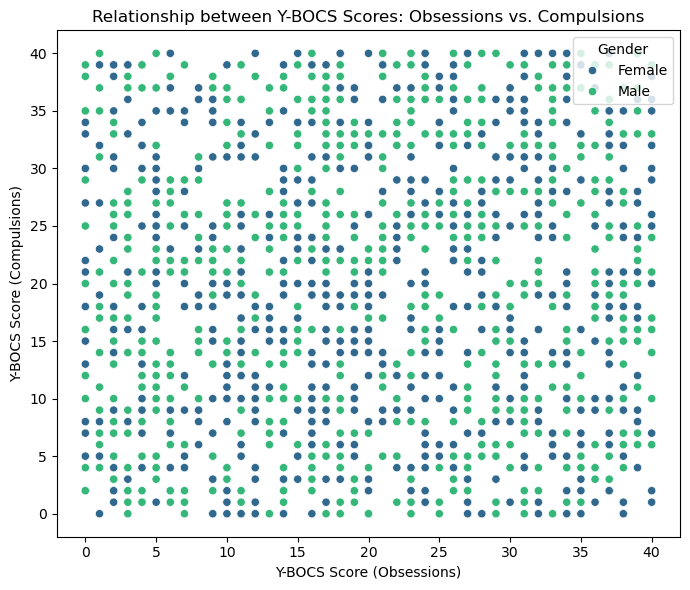

In [7]:
# Clinical Data Analysis

# Distribution of Symptom Duration
plt.figure(figsize=(8, 5))
sns.histplot(df['Duration of Symptoms (months)'], bins=20, kde=True, color='orchid')
plt.title('Distribution of Symptom Duration')
plt.xlabel('Duration (months)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Boxplot of Y-BOCS Scores by Gender
plt.figure(figsize=(6, 5))
sns.boxplot(x='Gender', y='Y-BOCS Score (Obsessions)', data=df, palette='coolwarm')
plt.title('Y-BOCS Obsession Scores by Gender')
plt.xlabel('Gender')
plt.ylabel('Y-BOCS Score (Obsessions)')
plt.tight_layout()
plt.show()

# Relationship between Obsession and Compulsion Y-BOCS Scores
plt.figure(figsize=(7, 6))
sns.scatterplot(
    x='Y-BOCS Score (Obsessions)', 
    y='Y-BOCS Score (Compulsions)', 
    hue='Gender', 
    data=df,
    palette='viridis'
)
plt.title('Relationship between Y-BOCS Scores: Obsessions vs. Compulsions')
plt.xlabel('Y-BOCS Score (Obsessions)')
plt.ylabel('Y-BOCS Score (Compulsions)')
plt.tight_layout()
plt.show()

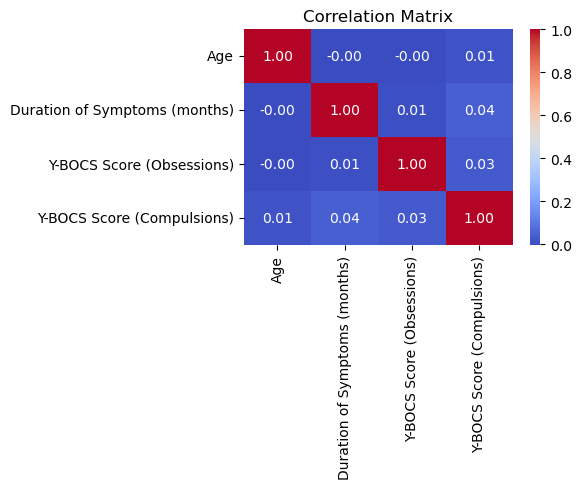

In [8]:
# Correlation Analysis
# Correlation Matrix
plt.figure(figsize=(6, 5))
corr_matrix = df[[
    'Age',
    'Duration of Symptoms (months)',
    'Y-BOCS Score (Obsessions)',
    'Y-BOCS Score (Compulsions)'
]].corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [9]:
# Key Insights and Reporting

# 1. Average values for key clinical measures
print("=== Descriptive Statistics ===")
print(df[['Age', 'Duration of Symptoms (months)', 
          'Y-BOCS Score (Obsessions)', 
          'Y-BOCS Score (Compulsions)']].describe())

# 2. Gender-wise average Y-BOCS scores
print("\n=== Gender-wise Average Y-BOCS Scores ===")
gender_avg = df.groupby('Gender')[['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']].mean()
print(gender_avg)

# 3. Count of patients by Ethnicity
print("\n=== Patient Count by Ethnicity ===")
print(df['Ethnicity'].value_counts())

# 4. Strongest correlations
print("\n=== Correlation Analysis ===")
corr_matrix = df[['Age', 'Duration of Symptoms (months)',
                  'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']].corr()
print(corr_matrix)

# 5. Patients with high OCD severity (arbitrary threshold)
print("\n=== Patients with High OCD Severity (Obsessions >= 20 or Compulsions >= 20) ===")
high_severity = df[(df['Y-BOCS Score (Obsessions)'] >= 20) | (df['Y-BOCS Score (Compulsions)'] >= 20)]
print(high_severity[['Age', 'Gender', 'Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']])

=== Descriptive Statistics ===
               Age  Duration of Symptoms (months)  Y-BOCS Score (Obsessions)  \
count  1500.000000                    1500.000000                1500.000000   
mean     46.781333                     121.745333                  20.048000   
std      16.830321                      67.404610                  11.823884   
min      18.000000                       6.000000                   0.000000   
25%      32.000000                      64.000000                  10.000000   
50%      47.000000                     121.000000                  20.000000   
75%      61.000000                     178.000000                  31.000000   
max      75.000000                     240.000000                  40.000000   

       Y-BOCS Score (Compulsions)  
count                  1500.00000  
mean                     19.62600  
std                      11.78287  
min                       0.00000  
25%                       9.00000  
50%                      20.0000

In [10]:
#Advanced Data Cleaning Code
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Copy original to avoid changing raw data
df_clean = df.copy()

# 1. ===== Missing Value Treatment =====
print("\n=== Missing Value Summary ===")
print(df_clean.isnull().sum())

# Example: Fill missing numerical values with median
num_cols = df_clean.select_dtypes(include=np.number).columns
df_clean[num_cols] = df_clean[num_cols].fillna(df_clean[num_cols].median())

# Fill categorical values with mode
cat_cols = df_clean.select_dtypes(include='object').columns
for col in cat_cols:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("\n=== Missing Values After Imputation ===")
print(df_clean.isnull().sum())

# 2. ===== Outlier Detection & Handling =====
# Example: Clip values using IQR method for 'Y-BOCS Score (Obsessions)'
for col in ['Y-BOCS Score (Obsessions)', 'Y-BOCS Score (Compulsions)']:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_clean[col] = np.clip(df_clean[col], lower, upper)

# 3. ===== Categorical Encoding =====
# Label encode Gender and Ethnicity
le = LabelEncoder()
df_clean['Gender_Encoded'] = le.fit_transform(df_clean['Gender'])
df_clean['Ethnicity_Encoded'] = le.fit_transform(df_clean['Ethnicity'])

# 4. ===== Feature Scaling =====
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_clean[num_cols])
df_scaled = pd.DataFrame(scaled_features, columns=num_cols)

# Reattach encoded columns
df_final = pd.concat([df_scaled, df_clean[['Gender_Encoded', 'Ethnicity_Encoded']]], axis=1)

print("\n=== Cleaned Data Preview ===")
print(df_final.head())


=== Missing Value Summary ===
Patient ID                         0
Age                                0
Gender                             0
Ethnicity                          0
Marital Status                     0
Education Level                    0
OCD Diagnosis Date                 0
Duration of Symptoms (months)      0
Previous Diagnoses               248
Family History of OCD              0
Obsession Type                     0
Compulsion Type                    0
Y-BOCS Score (Obsessions)          0
Y-BOCS Score (Compulsions)         0
Depression Diagnosis               0
Anxiety Diagnosis                  0
Medications                      386
dtype: int64

=== Missing Values After Imputation ===
Patient ID                       0
Age                              0
Gender                           0
Ethnicity                        0
Marital Status                   0
Education Level                  0
OCD Diagnosis Date               0
Duration of Symptoms (months)    0
Previo

In [11]:
# In-Depth Statistical Analysis
import pandas as pd
import scipy.stats as stats

# Use a copy to avoid changing the original data
data = df.copy()

# 1. T-Test: Gender vs Y-BOCS Score (Obsessions)
print("\n=== T-Test: Gender and Obsessions Score ===")
male_obs = data[data['Gender'] == 'Male']['Y-BOCS Score (Obsessions)']
female_obs = data[data['Gender'] == 'Female']['Y-BOCS Score (Obsessions)']

t_stat, p_val = stats.ttest_ind(male_obs, female_obs, equal_var=False)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Result: Significant difference between genders.")
else:
    print("Result: No significant difference.")

# 2. ANOVA: Ethnicity vs Y-BOCS Score (Compulsions)
print("\n=== ANOVA: Ethnicity and Compulsions Score ===")
groups = [group['Y-BOCS Score (Compulsions)'].dropna() for name, group in data.groupby('Ethnicity')]
f_stat, p_val = stats.f_oneway(*groups)
print(f"F-statistic: {f_stat:.3f}, P-value: {p_val:.4f}")
if p_val < 0.05:
    print("Result: Significant difference among ethnic groups.")
else:
    print("Result: No significant difference.")

# 3. Chi-Square Test: Gender vs Ethnicity
print("\n=== Chi-Square Test: Gender vs. Ethnicity ===")
contingency_table = pd.crosstab(data['Gender'], data['Ethnicity'])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"Chi-square: {chi2:.2f}, P-value: {p:.4f}")
if p < 0.05:
    print("Result: Gender and ethnicity are associated.")
else:
    print("Result: No association between gender and ethnicity.")

# 4. Correlation Significance Test: Obsessions vs. Compulsions
print("\n=== Pearson Correlation: Obsessions vs. Compulsions ===")
corr, p_value = stats.pearsonr(data['Y-BOCS Score (Obsessions)'], data['Y-BOCS Score (Compulsions)'])
print(f"Correlation: {corr:.3f}, P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Result: Statistically significant correlation.")
else:
    print("Result: No significant correlation.")


=== T-Test: Gender and Obsessions Score ===
T-statistic: -0.481, P-value: 0.6306
Result: No significant difference.

=== ANOVA: Ethnicity and Compulsions Score ===
F-statistic: 1.173, P-value: 0.3186
Result: No significant difference.

=== Chi-Square Test: Gender vs. Ethnicity ===
Chi-square: 6.73, P-value: 0.0812
Result: No association between gender and ethnicity.

=== Pearson Correlation: Obsessions vs. Compulsions ===
Correlation: 0.031, P-value: 0.2358
Result: No significant correlation.


In [12]:
#Feature Engineering
import pandas as pd
import numpy as np

# Work on a copy
df_fe = df.copy()

# 1. Create Age Groups
df_fe['Age_Group'] = pd.cut(df_fe['Age'], bins=[0, 18, 30, 45, 60, 100], 
                            labels=['Child', 'Young Adult', 'Adult', 'Middle Age', 'Senior'])

# 2. Create Symptom Duration Categories
df_fe['Symptom_Duration_Category'] = pd.cut(df_fe['Duration of Symptoms (months)'],
                                             bins=[0, 6, 24, 60, 120, np.inf],
                                             labels=['<6 mo', '6 mo–2 yr', '2–5 yr', '5–10 yr', '10+ yr'])

# 3. Create Total Y-BOCS Score
df_fe['Y-BOCS Total'] = df_fe['Y-BOCS Score (Obsessions)'] + df_fe['Y-BOCS Score (Compulsions)']

# 4. Categorize Y-BOCS Severity
df_fe['Severity'] = pd.cut(df_fe['Y-BOCS Total'],
                           bins=[0, 7, 15, 23, 31, 40],
                           labels=['Subclinical', 'Mild', 'Moderate', 'Severe', 'Extreme'])

# 5. Binary Encoding: Gender (optional)
df_fe['Gender_Code'] = df_fe['Gender'].map({'Male': 0, 'Female': 1})

# 6. Encode Ethnicity using one-hot encoding
df_fe = pd.get_dummies(df_fe, columns=['Ethnicity'], prefix='Ethnicity')

# Show the engineered features
print("\n=== Preview of Engineered Features ===")
print(df_fe[['Age', 'Age_Group', 'Duration of Symptoms (months)', 
             'Symptom_Duration_Category', 'Y-BOCS Total', 'Severity']].head())


=== Preview of Engineered Features ===
   Age    Age_Group  Duration of Symptoms (months) Symptom_Duration_Category  \
0   32        Adult                            203                    10+ yr   
1   69       Senior                            180                    10+ yr   
2   57   Middle Age                            173                    10+ yr   
3   27  Young Adult                            126                    10+ yr   
4   56   Middle Age                            168                    10+ yr   

   Y-BOCS Total     Severity  
0            27       Severe  
1            46          NaN  
2             7  Subclinical  
3            42          NaN  
4            57          NaN  


In [13]:
#Predictive Modeling (ML)
#require libraries
# Required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 1. Prepare Data
df_model = df.copy()

# Create total Y-BOCS score
df_model['Y-BOCS Total'] = df_model['Y-BOCS Score (Obsessions)'] + df_model['Y-BOCS Score (Compulsions)']

# Define severity categories
df_model['Severity'] = pd.cut(df_model['Y-BOCS Total'],
                               bins=[0, 7, 15, 23, 31, 40],
                               labels=['Subclinical', 'Mild', 'Moderate', 'Severe', 'Extreme'])

# Remove rows without severity
df_model = df_model.dropna(subset=['Severity'])

# Encode target variable
le = LabelEncoder()
df_model['Severity_Encoded'] = le.fit_transform(df_model['Severity'])

# Features to use
features = ['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)', 
            'Y-BOCS Score (Compulsions)', 'Gender', 'Ethnicity']

# Encode categorical features
df_model['Gender_Code'] = df_model['Gender'].map({'Male': 0, 'Female': 1})
df_model = pd.get_dummies(df_model, columns=['Ethnicity'], prefix='Ethnicity')

# Define X and y
X = df_model[['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)', 
              'Y-BOCS Score (Compulsions)', 'Gender_Code'] + 
              [col for col in df_model.columns if col.startswith('Ethnicity_')]]

y = df_model['Severity_Encoded']

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train Model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# 5. Evaluate
y_pred = model.predict(X_test_scaled)

print("=== Classification Report ===")
print(classification_report(y_test, y_pred, target_names=le.classes_))

print("\n=== Confusion Matrix ===")
print(confusion_matrix(y_test, y_pred))

=== Classification Report ===
              precision    recall  f1-score   support

     Extreme       0.95      0.94      0.95        66
        Mild       0.82      0.88      0.85        16
    Moderate       0.75      0.75      0.75        28
      Severe       0.79      0.79      0.79        38
 Subclinical       1.00      1.00      1.00         8

    accuracy                           0.87       156
   macro avg       0.86      0.87      0.87       156
weighted avg       0.87      0.87      0.87       156


=== Confusion Matrix ===
[[62  0  0  4  0]
 [ 0 14  2  0  0]
 [ 0  3 21  4  0]
 [ 3  0  5 30  0]
 [ 0  0  0  0  8]]


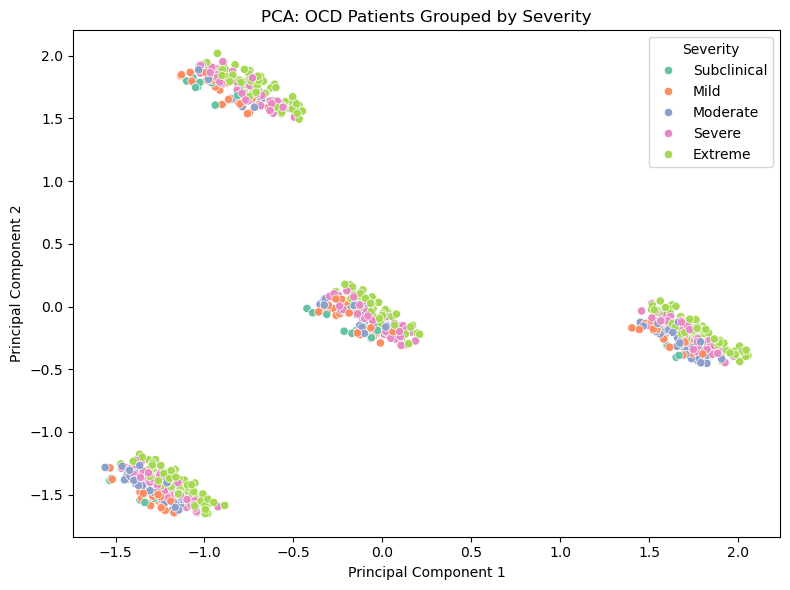

In [14]:
#Dimensionality Reduction using PCA 
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Work with a copy
df_pca = df.copy()

# Create total Y-BOCS and severity levels
df_pca['Y-BOCS Total'] = df_pca['Y-BOCS Score (Obsessions)'] + df_pca['Y-BOCS Score (Compulsions)']
df_pca['Severity'] = pd.cut(df_pca['Y-BOCS Total'],
                            bins=[0, 7, 15, 23, 31, 40],
                            labels=['Subclinical', 'Mild', 'Moderate', 'Severe', 'Extreme'])

# Encode categorical variables
df_pca['Gender_Code'] = df_pca['Gender'].map({'Male': 0, 'Female': 1})
df_pca = pd.get_dummies(df_pca, columns=['Ethnicity'], prefix='Ethnicity')

# Select numeric features
features = ['Age', 'Duration of Symptoms (months)', 'Y-BOCS Score (Obsessions)', 
            'Y-BOCS Score (Compulsions)', 'Gender_Code'] + \
            [col for col in df_pca.columns if col.startswith('Ethnicity_')]

X = df_pca[features].dropna()
y = df_pca.loc[X.index, 'Severity']  # Match index after dropna

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create PCA DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Severity'] = y.values

# Plot PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Severity', palette='Set2')
plt.title('PCA: OCD Patients Grouped by Severity')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()